In [35]:
from load_modules import *

plt.rcParams['figure.figsize'] = (14.0, 3.0)
plt.rcParams['figure.dpi'] = 250
plt.rcParams['lines.linewidth'] = 1

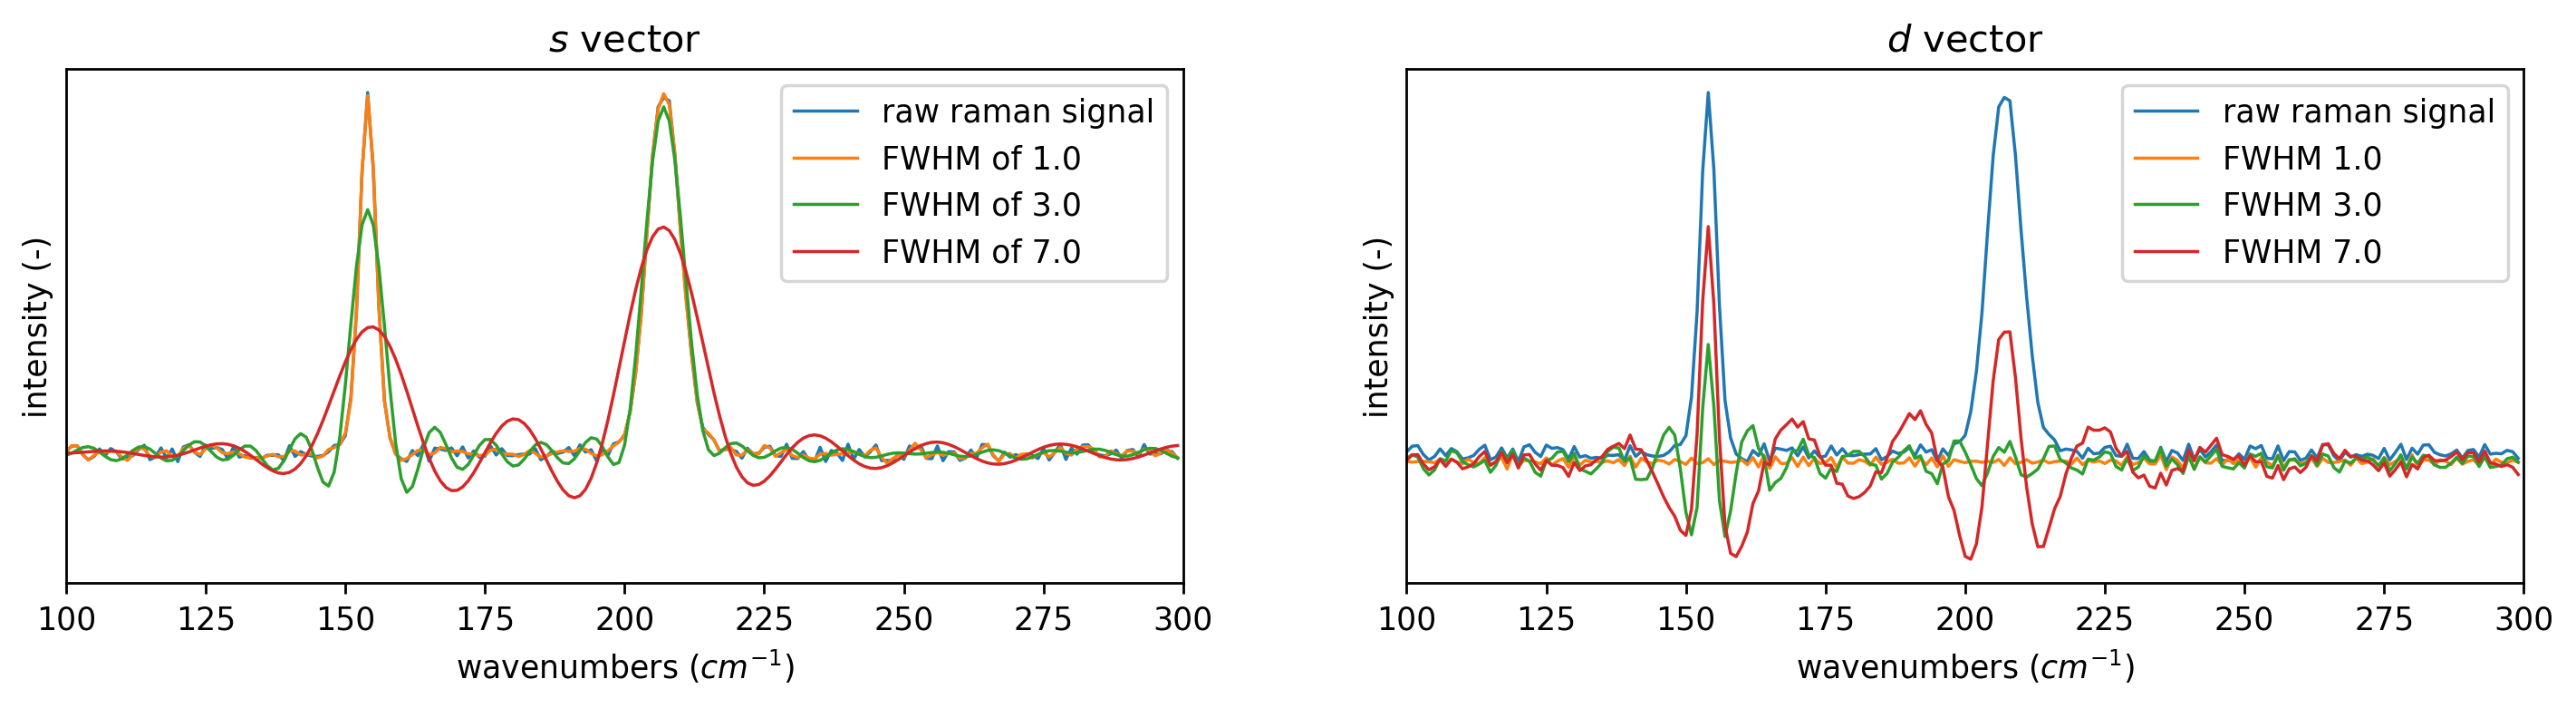

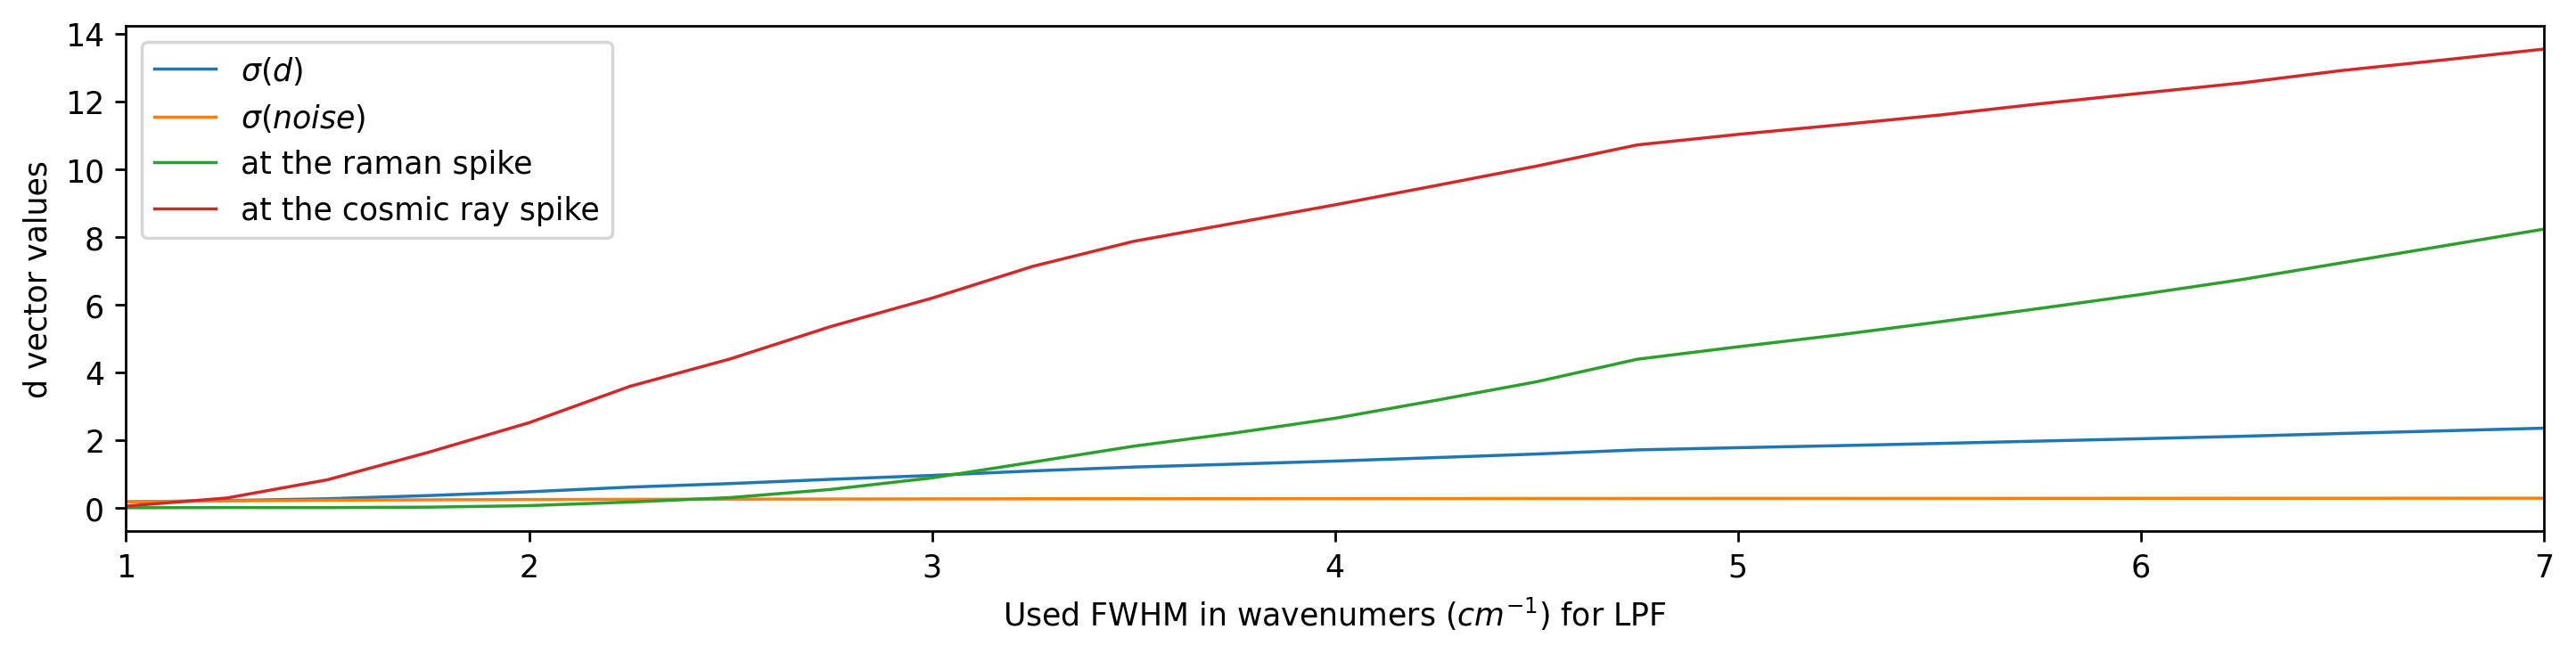

In [65]:
n = 200
x = np.arange(n)
FWHM1 = 7
FWHM2 = 3.5

fig, (ax0, ax1) = plt.subplots(nrows=1, ncols=2, sharey=True,
                                    figsize=(14, 3))
ax0.set_title(r'$s$ vector')
ax1.set_title(r'$d$ vector')

std = []
std2 = []
raman_r = []
cosmic_r = []
FWHM_smoothing_lst = np.arange(1,7.1,0.25)
for i in range(1000):
    noise = np.random.random(n)
    raman_mu = int(n * np.random.random())
    cosmic_mu = int(n * np.random.random())
    raman = 20 * LSQ.gaussian(x, np.array([raman_mu]), np.array([FWHM1 / (2 * np.sqrt(2 * np.log(2)))])).reshape(-1)
    cosmic = 20 * LSQ.gaussian(x, np.array([cosmic_mu]), np.array([FWHM2 / (2 * np.sqrt(2 * np.log(2)))])).reshape(-1)

    
    signal = noise+raman+cosmic

    
    
    tmp_std = []
    tmp_std2 = []
    tmp_raman_r = []
    tmp_cosmic_r = []

    for FWHM_smoothing in FWHM_smoothing_lst:
        k = int(2*(x[-1] - x[0]) / (3*FWHM_smoothing))

        cosine = dct(signal, type=2, norm='backward')
        cosine[k:] = 0
        smooth = dct(cosine, type=3, norm="forward")
        diff = signal - smooth

        if i == 0 and FWHM_smoothing in [1,3,7]:
            if FWHM_smoothing == 1:
                ax0.plot(x+100, signal, label="raw raman signal")
                ax1.plot(x+100,signal, label="raw raman signal")
            ax0.plot(x+100, smooth, label=f"FWHM of {FWHM_smoothing}")
            ax1.plot(x+100, diff, label=f"FWHM {FWHM_smoothing}")

        cosine = dct(noise, type=2, norm='backward')
        cosine[k:] = 0
        smooth = dct(cosine, type=3, norm="forward")
        diff2 = noise - smooth

        tmp_raman_r.append(diff[raman_mu])
        tmp_cosmic_r.append(diff[cosmic_mu])

        tmp_std.append(np.std(diff))
        tmp_std2.append(np.std(diff2))
    
    if i == 0:
        ax0.set_xlim(100,100+n)
        ax1.set_xlim(100,100+n)

        ax0.legend()
        ax1.legend()
        
        ax0.set_xlabel(r"wavenumbers ($cm^{-1}$)")
        ax1.set_xlabel(r"wavenumbers ($cm^{-1}$)")
        
        ax0.get_yaxis().set_ticks([])
        ax1.get_yaxis().set_ticks([])
        ax0.set_ylabel(r"intensity (-)")
        ax1.set_ylabel(r"intensity (-)")
        
#         ax0.tick_params(axis=u'y', which=u'both',length=0)
#         ax1.tick_params(axis=u'y', which=u'both',length=0)
#         ax1.set_ylabel(r"intensity (-)")

#         fig.suptitle("Examples of LPF with different FWHM")
        
        plt.show()

    std.append(tmp_std)
    std2.append(tmp_std2)
    raman_r.append(tmp_raman_r)
    cosmic_r.append(tmp_cosmic_r)
    
std = np.mean(np.array(std), 0)
std2 = np.mean(np.array(std2), 0)
raman_r = np.mean(np.array(raman_r), 0)
cosmic_r = np.mean(np.array(cosmic_r), 0)



plt.plot(FWHM_smoothing_lst, std, label=r"$\sigma(d)$")
plt.plot(FWHM_smoothing_lst, std2, label=r"$\sigma(noise)$")
plt.plot(FWHM_smoothing_lst, raman_r, label="at the raman spike")
plt.plot(FWHM_smoothing_lst, cosmic_r, label="at the cosmic ray spike")
plt.legend()
plt.xlim(1,7)
plt.xlabel(r"Used FWHM in wavenumers ($cm^{-1}$) for LPF")
plt.ylabel(r"d vector values")
# plt.title("")
plt.show()
